<a href="https://colab.research.google.com/github/jeetsj/ML_GWU/blob/master/MNIST_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
data = pd.read_csv("/content/drive/MyDrive/ML_Course/ML_project3/MNIST_train.csv")
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


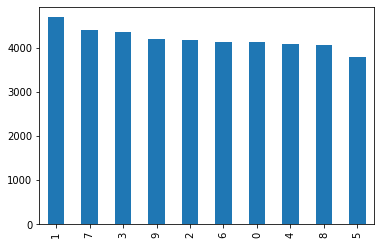

In [33]:
data['label'].value_counts().plot.bar()

In [34]:
Y = data['label'].values
X = data.drop('label',1).values

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size =0.15)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = X_train[5000:10000]
X_test= X_test[5000:10000]
Y_train= Y_train[5000:10000]
Y_test =Y_test[5000:10000]

X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

c = KNeighborsClassifier(n_neighbors = 4)
c.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [37]:
pred1 = c.predict(X_test)
print(len(pred1))

1300


In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred1))

0.8961538461538462


Text(0.5, 15.0, 'Predicted')

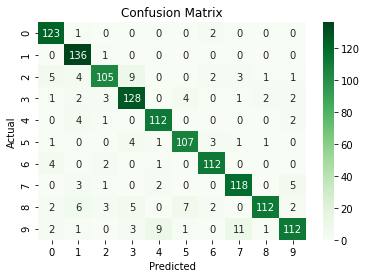

In [39]:
import pandas as pd
import seaborn as sns

m = confusion_matrix(Y_test,pred1 )
p = sns.heatmap(pd.DataFrame(m), annot=True, cmap="Greens" ,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [40]:
print(classification_report(Y_test, pred1))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       126
           1       0.87      0.99      0.93       137
           2       0.91      0.81      0.85       130
           3       0.86      0.90      0.88       143
           4       0.90      0.94      0.92       119
           5       0.90      0.91      0.90       118
           6       0.93      0.94      0.93       119
           7       0.88      0.91      0.90       129
           8       0.96      0.81      0.88       139
           9       0.90      0.80      0.85       140

    accuracy                           0.90      1300
   macro avg       0.90      0.90      0.90      1300
weighted avg       0.90      0.90      0.90      1300



# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

randomf = RandomForestRegressor(n_estimators = 200)
randomf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
predictions = randomf.predict(X_test)
pred2 = np.array(predictions.astype(int))

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred2))

0.4492307692307692


Text(0.5, 15.0, 'Predicted')

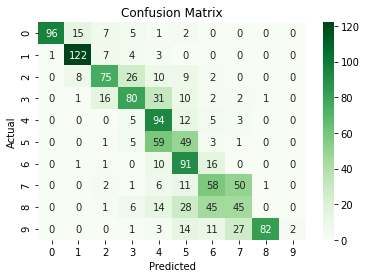

In [44]:
m = confusion_matrix(Y_test, pred2)
p = sns.heatmap(pd.DataFrame(m), annot=True, cmap="Greens" ,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [45]:
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       126
           1       0.83      0.89      0.86       137
           2       0.68      0.58      0.62       130
           3       0.60      0.56      0.58       143
           4       0.41      0.79      0.54       119
           5       0.22      0.42      0.28       118
           6       0.11      0.13      0.12       119
           7       0.39      0.39      0.39       129
           8       0.00      0.00      0.00       139
           9       1.00      0.01      0.03       140

    accuracy                           0.45      1300
   macro avg       0.52      0.45      0.43      1300
weighted avg       0.53      0.45      0.43      1300

